# Decision Tree

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



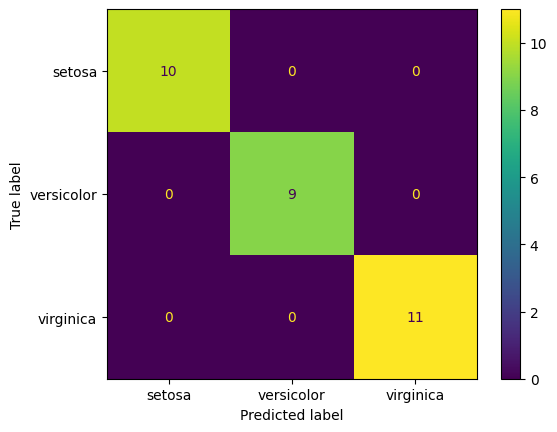

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay
)

# Load dataset
data = load_iris()
X, y = data.data, data.target
# X = X[:, 2:]  # Use only the last two features for simplicity

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=data.target_names)
cm_display.plot()

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)




In [4]:
# Feature importance
feature_importances = clf.feature_importances_
for i, importance in enumerate(feature_importances):
    print(f"Feature {data.feature_names[i]}: {importance:.4f}")

Feature sepal length (cm): 0.0000
Feature sepal width (cm): 0.0000
Feature petal length (cm): 0.9346
Feature petal width (cm): 0.0654


In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anishdevedward/loan-approval-dataset")

print("Path to dataset files:", path)

/home/iadel/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 44.9k/44.9k [00:00<00:00, 588kB/s]

Extracting files...
Path to dataset files: /home/iadel/.cache/kagglehub/datasets/anishdevedward/loan-approval-dataset/versions/1


In [9]:
import pandas as pd

loan_data = pd.read_csv(f'{path}/loan_approval.csv')
print(loan_data.head())

              name              city  ...  points  loan_approved
0     Allison Hill         East Jill  ...    50.0          False
1     Brandon Hall     New Jamesside  ...    55.0          False
2     Rhonda Smith      Lake Roberto  ...    45.0          False
3  Gabrielle Davis  West Melanieview  ...    50.0          False
4     Valerie Gray         Mariastad  ...    25.0          False

[5 rows x 8 columns]


In [11]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB


In [12]:
loan_data = loan_data.drop(columns=['name'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in loan_data.select_dtypes(include=['object', 'bool']).columns:
    loan_data[column] = le.fit_transform(loan_data[column])

print(loan_data.head())

   city  income  credit_score  ...  years_employed  points  loan_approved
0   326  113810           389  ...              27    50.0              0
1   989   44592           729  ...              28    55.0              0
2   763   33278           584  ...              13    45.0              0
3  1793  127196           344  ...              29    50.0              0
4   841   66048           496  ...               4    25.0              0

[5 rows x 7 columns]


In [14]:
loan_data.corr()

,city,income,credit_score,loan_amount,years_employed,points,loan_approved
city,1.000000,0.009722,0.031456,0.022250,-0.012942,0.014683,0.012750
income,0.009722,1.000000,-0.027113,0.037612,-0.014441,0.451142,0.238066
credit_score,0.031456,-0.027113,1.000000,-0.008076,0.023598,0.740899,0.715788
loan_amount,0.022250,0.037612,-0.008076,1.000000,0.013015,-0.223039,-0.157859
years_employed,-0.012942,-0.014441,0.023598,0.013015,1.000000,0.156441,0.104408
points,0.014683,0.451142,0.740899,-0.223039,0.156441,1.000000,0.821415
loan_approved,0.012750,0.238066,0.715788,-0.157859,0.104408,0.821415,1.000000


In [15]:
X = loan_data.drop(columns=['loan_approved'])
y = loan_data['loan_approved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
accuracy = accuracy_score(y_test, clf.predict(X_test))
print(f"Loan Approval Model Accuracy: {accuracy:.2f}")

Loan Approval Model Accuracy: 1.00


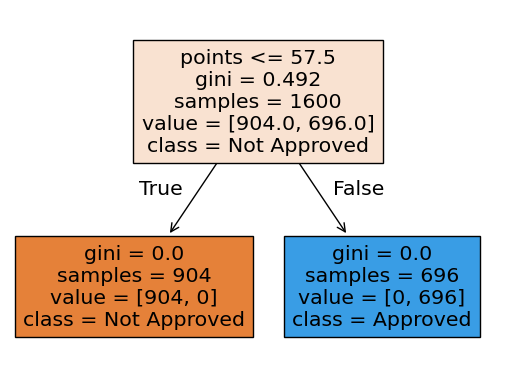

In [20]:
# Show the Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Approved',
    'Approved'])
plt.show()

# Random Forest

In [21]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/iadel/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


In [33]:
import pandas as pd

# Load Titanic dataset
titanic_data = pd.read_csv(f"{path}/Titanic-Dataset.csv")
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [34]:
titanic_data = titanic_data.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])
titanic_data['Embarked'] = titanic_data['Embarked'].fillna('S')
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())

print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None


In [35]:
X = titanic_data.drop(columns=['Survived'])
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', OrdinalEncoder(), ['Sex', 'Embarked'])
        ]
    )),
    ('classifier', RandomForestClassifier(n_estimators=40, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf_pipeline.predict(X_test))
print(f"Random Forest Model Accuracy: {rf_accuracy:.2f}")

Random Forest Model Accuracy: 0.78


In [37]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,male,28.0,1,1,15.2458,C
439,2,male,31.0,0,0,10.5000,S
840,3,male,20.0,0,0,7.9250,S
720,2,female,6.0,0,1,33.0000,S
39,3,female,14.0,1,0,11.2417,C
